### Librerías

In [17]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from scipy import stats

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Conexión SQL
# ==============================================================================
import psycopg2 as ps

import seaborn as sns

#Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas.
# ==============================================================================
import statsmodels.formula.api as sfm 

from sklearn.preprocessing import PolynomialFeatures 

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn import linear_model

### Conexión SQL

In [18]:
conexion = ps.connect(host="codbview.c21jlbp5d5qr.us-east-1.rds.amazonaws.com", database="codb", user="sgonzalez", password="AdarlaToda100%",port="5432")

In [19]:
# Creamos el cursor con el objeto conexion
cur = conexion.cursor()

# Ejecutamos una consulta
sql = """
select ipc ipc,activations,radio,tv,ooh,pop,digital_performance, eventos_alto_bitacora, eventos_bajo_bitacora, 
eventos_medio_bitacora
from sal_indicators_in sa 
where sales_channel = 'Telesales'
"""

consulta = cur.execute(sql)

data = cur.fetchall()

In [20]:
df = pd.DataFrame(data,columns=['ipc','activations','radio','tv','ooh','pop','digital_performance','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df['ipc']=df['ipc'].astype('float')
df['eventos_alto_bitacora']=df['eventos_alto_bitacora'].astype('float')
df['eventos_bajo_bitacora']=df['eventos_bajo_bitacora'].astype('float')
df['eventos_medio_bitacora']=df['eventos_medio_bitacora'].astype('float')

df = df.fillna(0)
#df = df.dropna()

df.head()

,ipc,activations,radio,tv,ooh,pop,digital_performance,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,1.60,16,41687525,771166,0,2884220.0,365633245,0.00,0.0,1.00
1,1.56,66,57231920,95440163,79373000,8170000.0,422084086,0.75,0.0,0.25
2,1.51,11,116243171,194643334,0,0.0,429255030,1.00,0.0,0.00
3,1.95,3,117469351,366792554,0,34349575.0,426026002,0.30,0.1,0.60
4,3.30,130,131734088,320208915,0,34349575.0,372675824,1.00,0.0,0.00


### Distribución de los Datos

<Figure size 2160x1440 with 0 Axes>

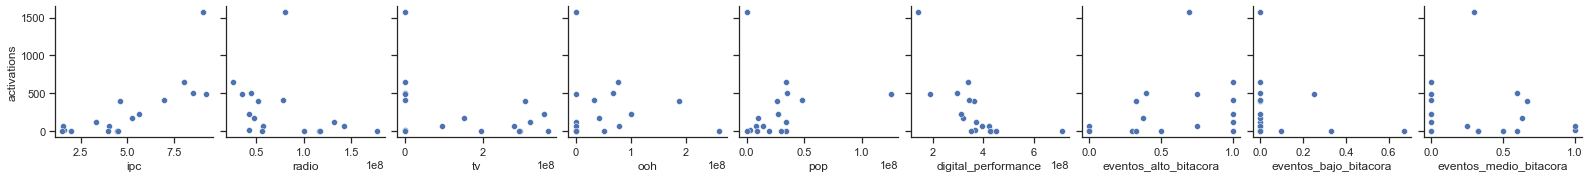

In [21]:
plt.figure(figsize=(30,20)) 
sns.set_theme(style="ticks")

sns.pairplot(df, x_vars=['ipc','radio','tv','ooh','pop','digital_performance','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'], y_vars=['activations']) 

plt.show()

### Correlaciones

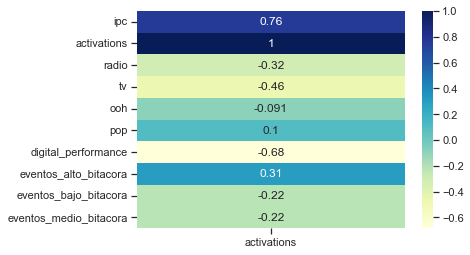

In [22]:
corrMatrix_1 = df.corr(method ='s')[['activations']]


sns.heatmap(corrMatrix_1, annot=True,cmap="YlGnBu")

plt.show()

### Omitir Variables 
De acuerdo a su correlación

In [23]:
del df['eventos_medio_bitacora']
#del df['ipc']
#del df['eventos_alto_bitacora']
#del df['ooh']
#del df['pop']
#del df['tv']
#del df['rotacion']
#del df['comisiones']
#del df['digital_performance']
del df['eventos_bajo_bitacora']

### Regresión Lineal

In [24]:
# División de los datos en train y test
# ==============================================================================
X = df.drop(columns='activations',axis=1)
y = df['activations']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.6183743803911338
MAE:  139.5638530811355
MSE:  23131.926861775493

explained_variance: 0.6187213735703123




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            activations   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                              10.57
Date:                Thu, 07 Jul 2022   Prob (F-statistic):                    0.000649
Time:                        09:23:33   Log-Likelihood:                         -110.79
No. Observations:                  17   AIC:                                      235.6
Df Residuals:                      10   BIC:                                      241.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
ipc                     121.4596     22.094      5.497      0.000      72.232     170.688
radio                  2.161e-06   1.87e-06      1.154      0.275   -2.01e-06    6.34e-06
tv                    -3.103e-07   4.94e-07     -0.628      0.544   -1.41e-06     7.9e-07
ooh                    2.629e-07   8.95e-07      0.294      0.775   -1.73e-06    2.26e-06
pop                   -5.544e-06   2.23e-06     -2.490      0.032   -1.05e-05   -5.83e-07
digital_performance   -1.145e-06   4.59e-07     -2.497      0.032   -2.17e-06   -1.23e-07
eventos_alto_bitacora   181.6950    148.825      1.221      0.250    -149.909     513.299
==============================================================================
Omnibus:                        2.323   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.669
Skew:                           0.592   Prob(JB):                        0.434
Kurtosis:                       2.024   Cond. No.                     1.26e+09
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.26e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['ipc', 'radio', 'tv', 'ooh', 'pop', 'eventos_alto_bitacora'], dtype='object')

w = [[ 1.87341379e+02 -2.05662785e-06  8.17607003e-07 -7.55818229e-07
  -7.85944788e-06  3.61562125e+02]], b = [-509.58541073]


\begin{align}
\dot{Activations} = \ IPC(7.33787633e+01) + Radio(2.87486416e-06) - TV(5.16981980e-07) - DigitalPerformance(1.65771920e-06) + EventosAltoBitacora(6.78815322e-01) + 333.89528136 \\
\end{align}

In [10]:
model.params

ipc                      1.127058e+02
radio                   -1.187758e-06
tv                      -2.534323e-07
ooh                     -7.683857e-07
pop                     -5.729985e-06
eventos_alto_bitacora    1.291577e+02
dtype: float64

### Modelo Regresión Activaciones con Recarga y con PAC

In [11]:
# Creamos el cursor con el objeto conexion
cur2 = conexion.cursor()

# Ejecutamos una consulta
sql2 = """
select ipc ipc,activations,activations_w_topups, activations_pacs,radio,tv,ooh,pop,digital_performance, 
eventos_alto_bitacora, eventos_bajo_bitacora, 
eventos_medio_bitacora
from sal_indicators_in sa 
where sales_channel = 'Telesales'
"""

consulta2 = cur2.execute(sql2)

data2 = cur2.fetchall()

In [12]:
df2 = pd.DataFrame(data2,columns=['ipc','activations','activations_w_topups','activations_pacs','radio','tv','ooh','pop','digital_performance','eventos_alto_bitacora','eventos_bajo_bitacora','eventos_medio_bitacora'])

df2['ipc']=df2['ipc'].astype('float')
df2['eventos_alto_bitacora']=df2['eventos_alto_bitacora'].astype('float')
df2['eventos_bajo_bitacora']=df2['eventos_bajo_bitacora'].astype('float')
df2['eventos_medio_bitacora']=df2['eventos_medio_bitacora'].astype('float')


df2 = df2.fillna(0)
#df = df.dropna()

df2.head()

,ipc,activations,activations_w_topups,activations_pacs,radio,tv,ooh,pop,digital_performance,eventos_alto_bitacora,eventos_bajo_bitacora,eventos_medio_bitacora
0,1.60,16,8,21,41687525,771166,0,2884220.0,365633245,0.00,0.0,1.00
1,1.56,66,53,74,57231920,95440163,79373000,8170000.0,422084086,0.75,0.0,0.25
2,1.51,11,26,31,116243171,194643334,0,0.0,429255030,1.00,0.0,0.00
3,1.95,3,13,17,117469351,366792554,0,34349575.0,426026002,0.30,0.1,0.60
4,3.30,130,22,27,131734088,320208915,0,34349575.0,372675824,1.00,0.0,0.00


##### Recargas

In [13]:
# División de los datos en train y test
# ==============================================================================

X = df2[['activations']]
y = df2['activations_w_topups']


X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.803646432964054
MAE:  52.40104214888169
MSE:  4949.324827001873

explained_variance: 0.8411214884689906




<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     activations_w_topups   R-squared (uncentered):                   0.943
Model:                              OLS   Adj. R-squared (uncentered):              0.940
Method:                   Least Squares   F-statistic:                              266.2
Date:                  Thu, 07 Jul 2022   Prob (F-statistic):                    2.15e-11
Time:                          09:22:48   Log-Likelihood:                         -92.914
No. Observations:                    17   AIC:                                      187.8
Df Residuals:                        16   BIC:                                      188.7
Df Model:                             1                                                  
Covariance Type:              nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
activations     0.4919      0.030     16.315      0.000       0.428       0.556
==============================================================================
Omnibus:                        2.896   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                1.272
Skew:                           0.636   Prob(JB):                        0.529
Kurtosis:                       3.424   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations'], dtype='object')

w = [[0.45278842]], b = [14.24727285]


\begin{align}
\dot{activations W topups} = \ activations(0.45278842) - 14.24727285\\
\end{align}

##### PACS

In [15]:
# División de los datos en train y test
# ==============================================================================
X = df2[['activations_w_topups']]
y = df2['activations_pacs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

#Prediction using test set 
y_pred = lin_reg.predict(X_test)
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

# Printing the metrics
print('R2 square:',metrics.r2_score(y_test, y_pred))
print('MAE: ', mae)
print('MSE: ', mse)
print('')

print('explained_variance:',metrics.explained_variance_score(y_test, y_pred))
print('')

print('')
model=sm.OLS(y,X).fit() 

model.summary()

R2 square: 0.9991798003711737
MAE:  3.2820648649087314
MSE:  19.497375476643427

explained_variance: 0.9994378608031667




<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       activations_pacs   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.101e+04
Date:                Thu, 07 Jul 2022   Prob (F-statistic):                    2.21e-26
Time:                        09:22:49   Log-Likelihood:                         -56.285
No. Observations:                  17   AIC:                                      114.6
Df Residuals:                      16   BIC:                                      115.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
activations_w_topups     1.0004      0.007    144.948      0.000       0.986       1.015
==============================================================================
Omnibus:                       17.295   Durbin-Watson:                   0.551
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.126
Skew:                           1.821   Prob(JB):                     0.000315
Kurtosis:                       6.082   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
print(X.columns)
print("")
print('w = ' + str(lin_reg.coef_) + ', b = ' + str(lin_reg.intercept_))

Index(['activations_w_topups'], dtype='object')

w = [[0.98810262]], b = [4.70325145]


\begin{align}
\dot{activations PACs} = \ activationsWtopups(0.98810262) + 4.70325145\\
\end{align}